C:\Users\equipo\AppData\Local\Temp\ipykernel_14384\569300083.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
C:\Users\equipo\AppData\Local\Temp\ipykernel_14384\569300083.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]


⚽ Proyecto Soccer: Análisis Completado
P-value: 0.0051
Conclusión: reject null hypothesis.


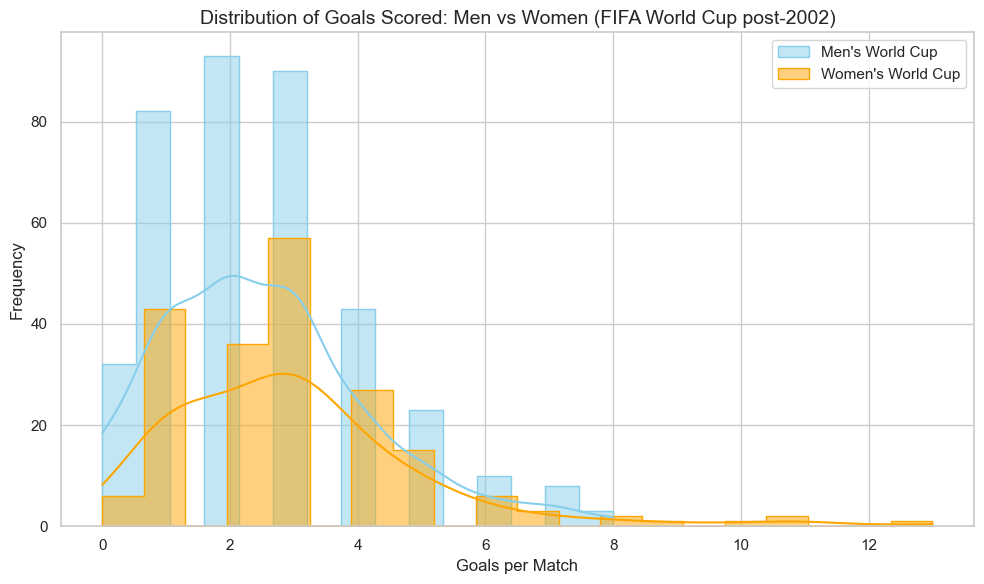

In [5]:
import pandas as pd
import pingouin
import os

# --- 1. CARGA DE DATOS DE SOCCER ---
data_folder = 'data'
try:
    # Solo cargamos lo que pertenece a este proyecto
    men = pd.read_csv(os.path.join(data_folder, 'men_results.csv'))
    women = pd.read_csv(os.path.join(data_folder, 'women_results.csv'))

    # --- 2. FILTRADO (Solo FIFA World Cup después de 2002) ---
    men["date"] = pd.to_datetime(men["date"])
    men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]

    women["date"] = pd.to_datetime(women["date"])
    women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

    # --- 3. CÁLCULO DE GOLES ---
    men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
    women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

    # --- 4. TEST DE HIPÓTESIS (Mann-Whitney U) ---
    # Queremos saber si en el femenino se anotan MÁS goles (alternative="greater")
    results_pg = pingouin.mwu(x=women_subset["goals_scored"], 
                              y=men_subset["goals_scored"], 
                              alternative="greater")

    p_val = results_pg["p-val"].values[0]
    result = "reject" if p_val <= 0.01 else "fail to reject"
    
    print(f"⚽ Proyecto Soccer: Análisis Completado")
    print(f"P-value: {p_val:.4f}")
    print(f"Conclusión: {result} null hypothesis.")

except FileNotFoundError:
    print(f"❌ Error: No encontré 'men_results.csv' o 'women_results.csv' en la carpeta '{data_folder}'")
    # --- 5. VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar el estilo profesional
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Crear el histograma con KDE (Densidad)
# Usamos los nombres de columnas estándar del proyecto
sns.histplot(data=men_subset, x="goals_scored", color="skyblue", label="Men's World Cup", kde=True, element="step", alpha=0.5)
sns.histplot(data=women_subset, x="goals_scored", color="orange", label="Women's World Cup", kde=True, element="step", alpha=0.5)

# 3. Personalización con los títulos que ya validamos para tu reporte [cite: 73, 96]
plt.title("Distribution of Goals Scored: Men vs Women (FIFA World Cup post-2002)", fontsize=14)
plt.xlabel("Goals per Match", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

# 4. Forzar la visualización (Esto es lo que puede estar faltando)
plt.tight_layout()
plt.savefig("soccer_goals_distribution.png", dpi=300) # Guarda una copia en alta calidad
plt.show() # Renderiza la gráfica en pantalla